In [ ]:
#remove at the end
# from google.colab import drive
# drive.mount('/content/drive')
# %cd drive/MyDrive/Pattern recognition and machine learning/fma/submission
# !ls 
# !pip install python-dotenv

Mounted at /content/drive
/content/drive/MyDrive/Pattern recognition and machine learning/fma/submission
'Copie de predict_year.ipynb'   Preprocessing.ipynb     utils.py
 data_distribution.png	        __pycache__	        X_test_CNN.npy
 dataset.csv		        spectrograms	        X_test_SVM.npy
 features.csv		        spectrograms_test       X_train_CNN.npy
 fma_small		        svm_model_linear.sav    X_train_SVM.npy
 intro_cnn_my_model.h5	        svm_model_poly.sav      X_val_CNN.npy
 intro_DenseNet121.h5	        svm_model_rbf.sav       X_val_SVM.npy
 intro_resnet_18_2.h5	        svm_model_sigmoid.sav   Y_test_CNN.npy
 intro_resnet_18.h5	        test_hist.png	        Y_test_SVM.npy
 intro_resnet_final.h5	        test.ipynb	        Y_train_CNN.npy
 just_test.h5		        test_spectrograms       Y_train_SVM.npy
 model.h5		        tracks.csv	        Y_val_CNN.npy
 plots_intro		        train.ipynb	        Y_val_SVM.npy
 predict_year.ipynb	        Untitled


In [ ]:
#%matplotlib inline
import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition
import librosa
import librosa.display
import utils
plt.rcParams['figure.figsize'] = (17, 5)

In [ ]:
# Load metadata and features.
tracks = utils.load('tracks.csv')

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
3,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album
20,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album


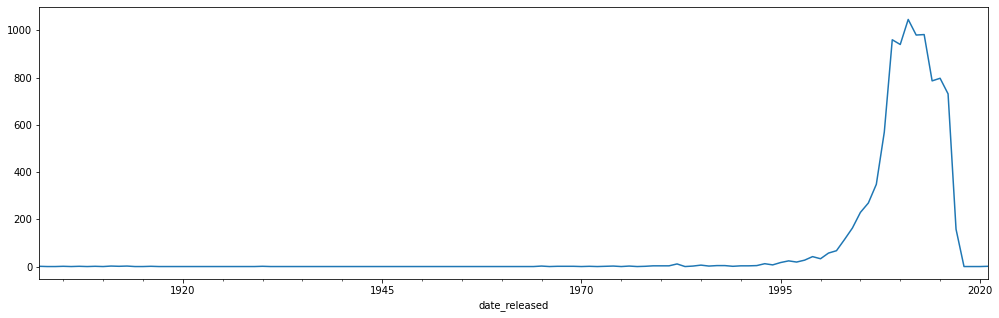

In [ ]:
def plot(col0, col1):
    if col0 == 'track':
        d = tracks['track']
    if col0 in ['artist', 'album']:
        d = tracks[col0].drop_duplicates('id')
    d = pd.Series(1, index=d[col1])
    d.resample('A').sum().fillna(0).plot()

def explore_dataset():

    ipd.display(tracks['album'].head())
    #plot track
    plt.figure()
    plot('album', 'date_released')

explore_dataset()

In [ ]:
# metadata according to the small audio data
def create_metadata_dataset():
    import numpy as np

    directory_1 = 'fma_small/fma_small'
    track_id=[]
    year=[]
    df = pd.DataFrame()

    for filename in os.listdir(directory_1):
        if filename != ("README.txt") and filename != ("checksums"):
            directory_2=directory_1 + '/' + filename
            for audioname in os.listdir(directory_2):
                audioname=audioname.replace('.mp3','')
                if '(' in audioname:
                    audioname=audioname.replace('(1)','')
                
            
                if  not pd.isnull(tracks['album'].loc[int(audioname)]['date_released']):
                    print(int(audioname))
                    print(tracks['album'].loc[int(audioname)]['date_released'])
                    year.append(tracks['album'].loc[int(audioname)]['date_released'])
                    track_id.append(int(audioname))

    df['track_id']=track_id
    df['year']=year

    #only to generate dataset
    #set track_id as index 
    df=df.set_index('track_id')
    #sort the dataframe
    df.sort_index(inplace=True)
    #save df in .csv file. dataset.csv contains the song id and the corresponding release year
    df.to_csv('dataset.csv')

create_metadata_dataset()


145704
2016-10-04 00:00:00
145783
2016-10-19 00:00:00
145729
2016-10-18 00:00:00
145750
2016-10-25 00:00:00
145746
2016-10-18 00:00:00
145743
2016-10-18 00:00:00
145708
2016-10-25 00:00:00
145728
2016-10-18 00:00:00
145703
2016-10-04 00:00:00
145241
2016-10-20 00:00:00
145041
2016-10-13 00:00:00
145556
2007-06-26 00:00:00
145554
2007-06-26 00:00:00
145199
2016-10-19 00:00:00
145068
2014-05-05 00:00:00
145551
2007-06-26 00:00:00
145059
1999-01-01 00:00:00
145067
2014-05-05 00:00:00
145705
2016-10-04 00:00:00
145553
2007-06-26 00:00:00
145747
2016-10-25 00:00:00
145550
2007-06-26 00:00:00
145706
2016-10-04 00:00:00
145555
2007-06-26 00:00:00
145711
2016-10-25 00:00:00
145645
2016-11-01 00:00:00
145458
2016-10-27 00:00:00


KeyboardInterrupt: ignored

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 8.000e+00, 0.000e+00, 9.000e+00, 3.000e+00, 9.000e+00,
        7.900e+01, 1.880e+02, 1.246e+03, 3.119e+03, 6.820e+02]),
 array([704553.        , 706511.64705882, 708470.29411765, 710428.94117647,
        712387.58823529, 714346.23529412, 716304.88235294, 718263.52941176,
        720222.17647059, 722180.82352941, 724139.47058824, 726098.11764706,
        728056.76470588, 730015.41176471, 731974.05882353, 733932.70588235,
        735891.35294118, 737850.        ]),
 <a list of 17 Patch objects>)

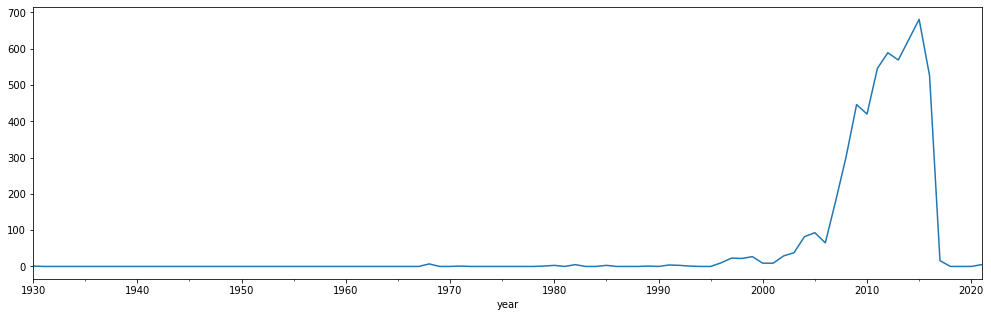

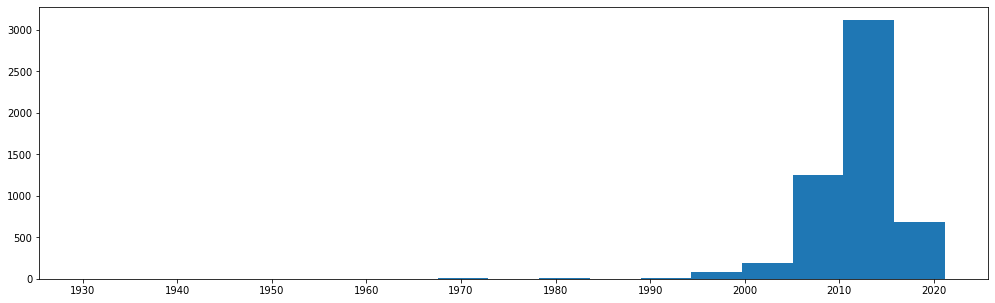

In [ ]:
#histogram of the data
df=pd.read_csv('dataset.csv', index_col=0)
df['year'] = pd.to_datetime(df.year)
d=[]
d = pd.Series(1, index=df['year'])
plt.figure()
d.resample('A').sum().fillna(0).plot()
plt.savefig('test_hist')

plt.figure()
plt.hist(df.year,bins=17)

In [ ]:
#create spectrogram and save them in the directory spectrograms
def convert_audio_to_spectrogram(audio_path, audio_name):
    x, sr = librosa.load(audio_path)#, sr=None, mono=True)
    spect = librosa.feature.melspectrogram(y=x, sr=sr,n_fft=2048, hop_length=2048)
    #plot
    plt.figure(figsize=(12, 4))
    ax = plt.axes()
    ax.set_axis_off()   
    spect = librosa.power_to_db(spect, ref=np.max)
    librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
    #save image
    plt.savefig('spectrograms/' + audio_name +'.png', bbox_inches='tight', pad_inches=0)
    del spect, x, sr, ax


def create_spectrogram_dataset():

    directory_1 = 'fma_small/fma_small'
    directories = []#pd.DataFrame()

    for filename in sorted(os.listdir(directory_1)):
        if filename != ("README.txt") and filename != ("checksums"):
            directory_2=directory_1 + '/' + filename
            directories.append(filename)
            print(directories)
            for audioname in sorted(os.listdir(directory_2)):
                try:
                    tmp_audioname=audioname.replace(".mp3","")
                    if not '(' in audioname: 
                        if  not pd.isnull(tracks['album'].loc[int(tmp_audioname)]['date_released']): 
                            audio_path=directory_2 + "/" + audioname
                            convert_audio_to_spectrogram(audio_path,tmp_audioname)                            
                except:
                    print("Not processed : " , tmp_audioname)
                    continue

path = "./spectrograms"
if not os.path.exists(path):
    os.makedirs(path)
    print("spectrograms directory created")
create_spectrogram_dataset()

spectrograms directory created
['000']


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

Not processed :  000203


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Not processed :  000207


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Not processed :  000211


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [ ]:
#generate input and output of the network and save them in X and Y
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from keras.preprocessing.image import img_to_array
X =[]
dir_spectrogram='spectrograms'
Y=[]
for spect_name in sorted(os.listdir(dir_spectrogram)):
    try:
        if df.loc[int(spect_name.replace(".png",""))]['year'].year<2000 or df.loc[int(spect_name.replace(".png",""))]['year'].year>2016 :
            df.drop(int(spect_name.replace(".png","")), inplace=True)
        else: 
            Y.append(df.loc[int(spect_name.replace(".png",""))]['year'].year%2000)
            spect_image = cv2.imread(dir_spectrogram + '/' + spect_name)
            spect_image = cv2.resize(spect_image, (323, 128))
            spect_image_array=img_to_array(spect_image)
            X.append(spect_image_array)
    except:
        print("Not processed : " , spect_name)
        continue

Not processed :  000207.png
Not processed :  016095.png
Not processed :  016337.png
Not processed :  016339.png
Not processed :  016340.png
Not processed :  016354.png
Not processed :  016743.png
Not processed :  016744.png
Not processed :  030690.png


([<matplotlib.axis.XTick at 0x7f1515fe15d0>,
 <a list of 16 Text major ticklabel objects>)

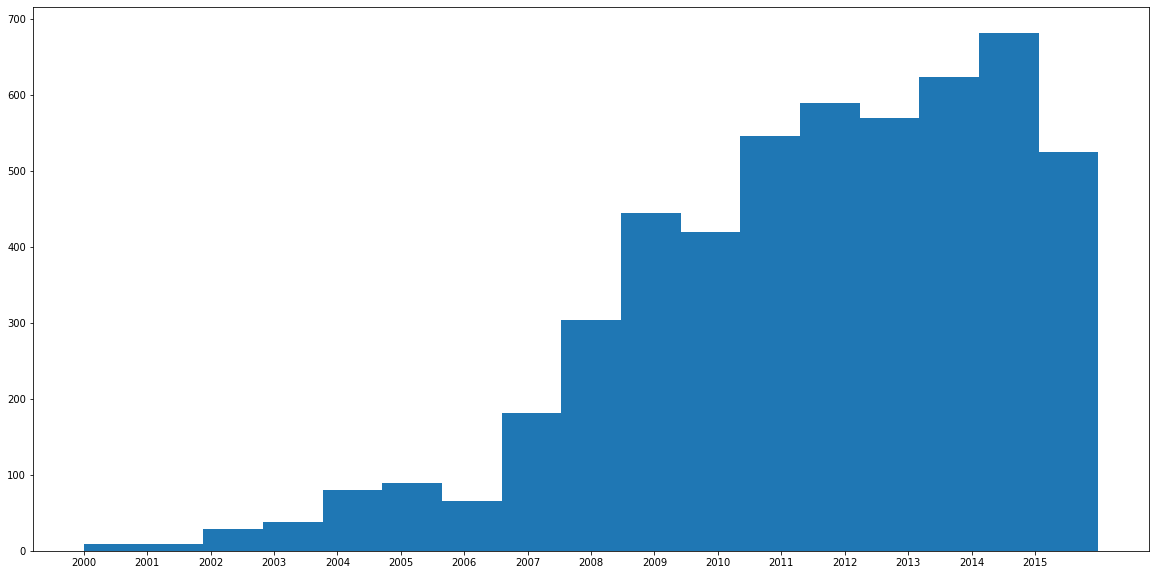

In [ ]:
#plot histogram of the data after preprocessing
Y_tem=[]
for index, integer in enumerate(Y):
    Y_tem.append(Y[index] + 2000)
plt.figure(figsize=(20,10))
plt.hist(Y_tem, density=False,bins=17)
plt.xticks(range(2000, 2016, 1))
plt.savefig('hist_after_preprocessing')

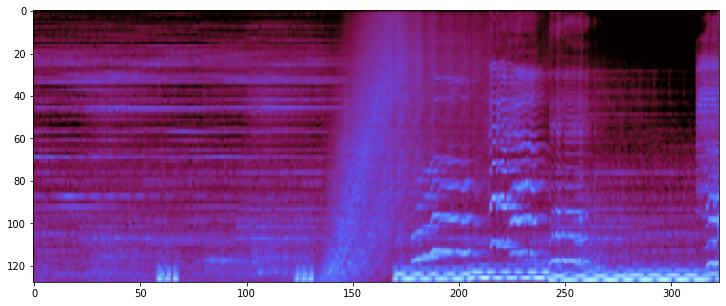

In [ ]:
# plot a spectrogram example
from matplotlib.pyplot import imshow
imshow(spect_image)

In [ ]:
from numpy import save
from numpy import asarray
from keras.utils import np_utils 
X=asarray(X)
Y=asarray(Y)
Y=np_utils.to_categorical(Y, num_classes=17)

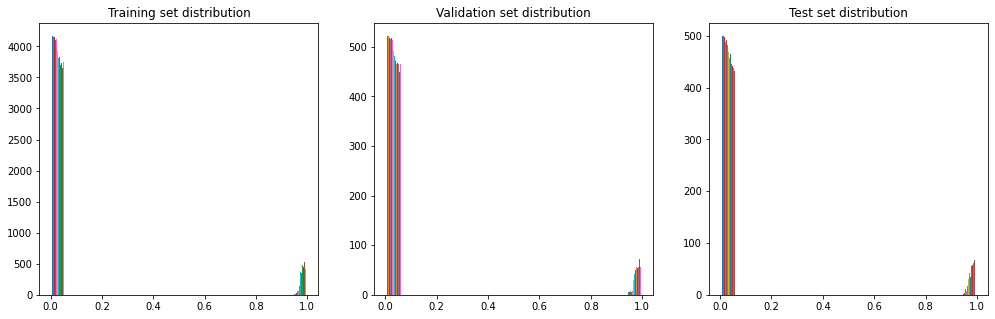

In [ ]:
#split dataset
from sklearn.utils import shuffle
def getData(start, stop):
    X_, y_ = shuffle(X, Y)
    return X_[start:stop], y_[start:stop]
X_train, Y_train = getData(0, 4176)
X_val, Y_val = getData(4176, 4698)
X_test, Y_test =  getData(4698, -1)
del X,Y

# display some labeling information
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3) 
x,bins,a = ax1.hist(Y_train,bins="auto")
x,bins,a = ax2.hist(Y_val,bins="auto")
x,bins,a = ax3.hist(Y_test,bins="auto")
ax1.title.set_text("Training set distribution")
ax2.title.set_text('Validation set distribution')
ax3.title.set_text('Test set distribution')


#normalization
X_train=X_train/255.0
X_test=X_test/255.0
X_val=X_val/255.0

In [ ]:
# save train, validation and test set
from numpy import save
save('X_train_CNN.npy',(X_train))
save('Y_train_CNN.npy',(Y_train))

save('X_val_CNN.npy',(X_val))
save('Y_val_CNN.npy',(Y_val))

save('X_test_CNN.npy',(X_test))
save('Y_test_CNN.npy',(Y_test))